In [0]:
import seaborn as sn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Mount & Read File From Drive

Bisa dirubah jika tidak ingin membaca file dari drive dengan :


dataset = pd.read_csv("path or filename(jika dalam satu folder)")

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')
dataset = pd.read_csv("gdrive/My Drive/Colab Notebooks/Dataset.csv")
dataset2 = dataset.copy()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Data Exploration**

In [0]:
data = dataset[['skill_dribbling','skill_curve','skill_ball_control','height_cm','weight_kg','age','power_strength','skill_moves']]

In [0]:
data.head()

,skill_dribbling,skill_curve,skill_ball_control,height_cm,weight_kg,age,power_strength,skill_moves
0,97,93,96,170,72,32,68,4
1,89,81,92,187,83,34,78,5
2,96,88,95,175,68,27,49,5
3,12,13,30,188,87,26,78,1
4,95,83,94,175,74,28,63,4


1. Melihat dimensi data

In [0]:
data.shape

(18278, 8)

2. Melihat tipe data dari masing-masing kolom

In [0]:
data.dtypes

skill_dribbling       int64
skill_curve           int64
skill_ball_control    int64
height_cm             int64
weight_kg             int64
age                   int64
power_strength        int64
skill_moves           int64
dtype: object

3. Missing Value

In [0]:
data.describe()

,skill_dribbling,skill_curve,skill_ball_control,height_cm,weight_kg,age,power_strength,skill_moves
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,55.596509,47.325692,58.461976,181.362184,75.276343,25.283291,65.234763,2.368038
std,18.929118,18.422991,16.741878,6.756961,7.047744,4.656964,12.534811,0.765038
min,4.000000,6.000000,5.000000,156.000000,50.000000,16.000000,20.000000,1.000000
25%,50.000000,34.000000,54.000000,177.000000,70.000000,22.000000,58.000000,2.000000
50%,61.000000,49.000000,63.000000,181.000000,75.000000,25.000000,66.000000,2.000000
75%,68.000000,62.000000,69.000000,186.000000,80.000000,29.000000,74.000000,3.000000
max,97.000000,94.000000,96.000000,205.000000,110.000000,42.000000,97.000000,5.000000


In [0]:
print(data.isnull().sum())

skill_dribbling       0
skill_curve           0
skill_ball_control    0
height_cm             0
weight_kg             0
age                   0
power_strength        0
skill_moves           0
dtype: int64


tidak ada missing value

4. Outlier

<Figure size 9000x9000 with 0 Axes>

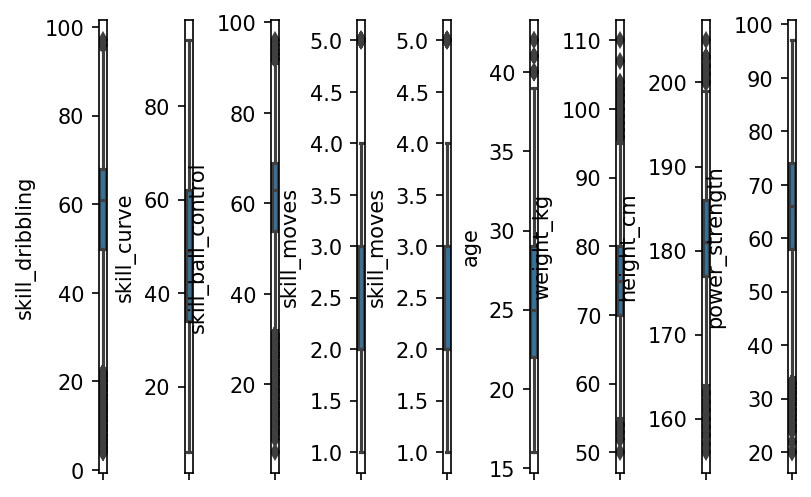

In [0]:
mpl.rcParams['figure.dpi'] = 150
plt.figure(figsize=(60, 60))
f, axes = plt.subplots(1, 9)
sns.boxplot(y=data["skill_dribbling"], ax=axes[0])
sns.boxplot(y=data["skill_curve"], ax=axes[1])
sns.boxplot(y=data["skill_ball_control"], ax=axes[2])
sns.boxplot(y=data["skill_moves"], ax=axes[3])
sns.boxplot(y=dataset2["skill_moves"], ax=axes[4])
sns.boxplot(y=dataset2["age"], ax=axes[5])
sns.boxplot(y=dataset2["weight_kg"], ax=axes[6])
sns.boxplot(y=dataset2["height_cm"], ax=axes[7])
sns.boxplot(y=dataset2["power_strength"], ax=axes[8])
plt.subplots_adjust(wspace=10)

outlier ada, tapi masih termasuk data yang wajar. nilai outlier diambil dari quartil, tapi bukan berarti data yang termasuk outlier itu tidak mungkin.

5. Distribusi data pada kolom *skill_moves*

In [0]:
dataset.groupby('skill_moves').size()

skill_moves
1    2036
2    8617
3    6536
4    1040
5      49
dtype: int64

6. Korelasi antar fitur

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

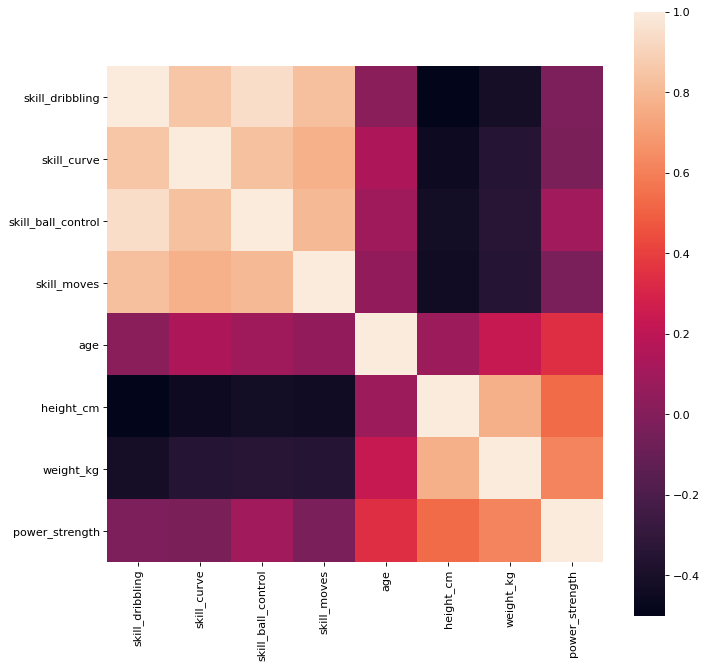

In [0]:
# %matplotlib inline  

mpl.rcParams['figure.dpi'] = 80
corr = dataset.select_dtypes(include = ['int64']).iloc[:, :].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
# ax.set_xticklabels(rotation=30)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

## **Model 1**

## **Data Preparation**

1. Memilih kolom yang akan digunakan berdasarkan heatmap

yang memiliki korelasi tinggi dengan kolom skill_moves

In [0]:
dataset = data[['skill_dribbling','skill_curve','skill_ball_control','skill_moves']]

2. memisahkan kolom "skill_moves" (label) dari fitur-fitur yang lain

In [0]:
#skill_moves sbg label
label = dataset['skill_moves'].tolist()
dataset = dataset.drop(columns=['skill_moves'])
# print(dataset)

3. Split data train & data test

dengan porsi Train 70% Test 30%

In [0]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.3, random_state = 0)

## **Pemodelan**

proses pembentukan model dengan metode Naive bayes

In [0]:
model = GaussianNB()
model.fit(x_train,y_train)

y_predict = model.predict(x_test)

# print(y_predict)
y_predict

array([3, 2, 2, ..., 3, 3, 1])

## **EVALUASI**

Confusion Matrix

In [0]:
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_predict, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

df_confusion

Predicted,1,2,3,4,5
Actual,,,,,
1,593,8,0,0,0
2,14,2078,537,1,0
3,0,193,1571,174,1
4,0,0,123,167,13
5,0,0,0,7,4


Akurasi

In [0]:
print("Akurasi Model : ",metrics.accuracy_score(y_test,y_predict))

Akurasi Model :  0.8047045951859956


Model Pertama Selesai

## **Model 2**

## **Data Preparation**

1. Memilih kolom yang akan digunakan berdasarkan heatmap

yang memiliki korelasi rendah dengan kolom skill_moves

In [0]:
dataset2 = data[['height_cm','weight_kg','age','power_strength','skill_moves']]

2. memisahkan kolom "skill_moves" (label) dari fitur-fitur yang lain

In [0]:
#skill_moves sbg label
label = dataset2['skill_moves'].tolist()
dataset2 = dataset2.drop(columns=['skill_moves'])
# print(dataset)

3. Split data train & data test

dengan porsi Train 70% Test 30%

In [0]:
x_train, x_test, y_train, y_test = train_test_split(dataset2, label, test_size=0.3, random_state = 0)

## **Pemodelan**

In [0]:
model = GaussianNB()
model.fit(x_train,y_train)

y_predict = model.predict(x_test)

# print(y_predict)
y_predict

array([3, 2, 2, ..., 2, 2, 2])

## **Evaluasi**

Confusion Matrix

In [0]:
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_predict, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

df_confusion

Predicted,1,2,3
Actual,,,
1,283,280,38
2,62,1689,879
3,17,810,1112
4,3,86,214
5,0,3,8


Akurasi

In [0]:
print("Akurasi Model : ",metrics.accuracy_score(y_test,y_predict))

Akurasi Model :  0.562363238512035


Model Kedua Selesai